# 4.10 Task Part 1 (notebook 5)

## Table of Contents
### Merging main data frame with 'departments_wrangled.csv' data frame to put department names into the main data frame.
### Horizontal bar chart for frequency of department orders
### Histogram for 'days_since_prior_order' (how often do customers return to instacart?)
### Horizontal bar chart showing total orders by department and region
### Horizontal bar chart showing total orders by department and region normalizing for different region sizes
### Line chart for average (mean) order price by hour of day

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see everything

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,income_range,age_range
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young


In [6]:
df.shape

(30964564, 35)

## Which departments have the highest frequency of product orders?

In [7]:
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [8]:
depts.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
# Renaming the 'Unnamde: 0' column

depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [10]:
depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
# Merging depts with df

df_merged = df.merge(depts, on = 'department_id')

In [12]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,income_range,age_range,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages


In [13]:
df_merged.shape

(30964564, 36)

In [14]:
# Frequency of departments

df_merged['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

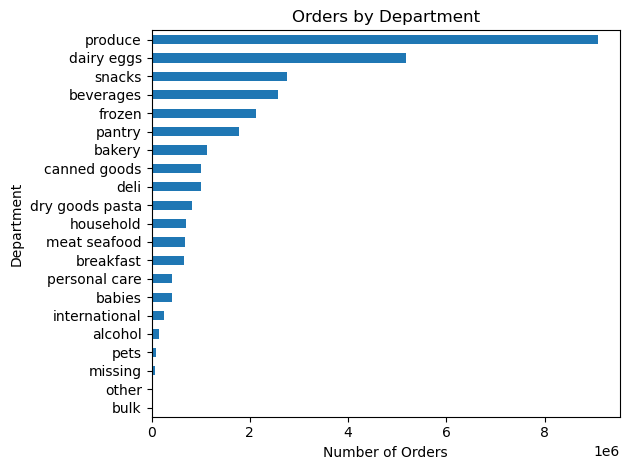

In [15]:
# Creating a horizontal bar chart for frequency of department orders

df_merged['department'].value_counts().sort_values().plot.barh()

# Add labels and a title
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.title('Orders by Department')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department.png'), bbox_inches='tight', pad_inches=0.1)

## How often do customers return to instacart?

In [16]:
# Frequency for 'days_since_prior_order'

df_merged['days_since_prior_order'].value_counts()

days_since_prior_order
7.0     3417439
30.0    2674369
6.0     2478763
5.0     2097483
4.0     2057523
8.0     1893814
3.0     1859814
2.0     1451368
9.0     1190720
14.0     991305
10.0     943601
1.0      931690
13.0     822986
11.0     797928
12.0     750735
15.0     645987
16.0     441608
0.0      438011
21.0     420431
17.0     365616
20.0     361307
18.0     336197
19.0     319029
22.0     292484
28.0     236454
23.0     212814
27.0     190387
24.0     182811
25.0     169829
26.0     167175
29.0     163603
Name: count, dtype: int64

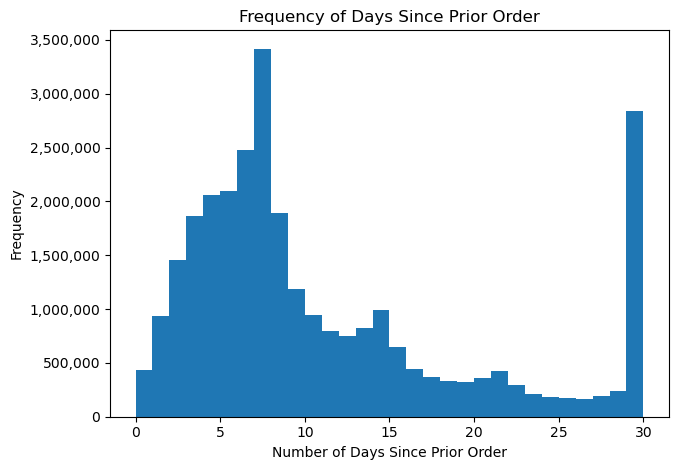

In [17]:
# Histogram for 'days_since_prior_order'
from matplotlib.ticker import ScalarFormatter, FuncFormatter

df_merged['days_since_prior_order'].plot.hist(bins = 30)

# Add labels and a title
plt.xlabel('Number of Days Since Prior Order')
plt.ylabel('Frequency')
plt.title('Frequency of Days Since Prior Order')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'days_since_prior_order.png'), bbox_inches='tight', pad_inches=0.1)

## Are there differences in ordering habits based on a customer's region?

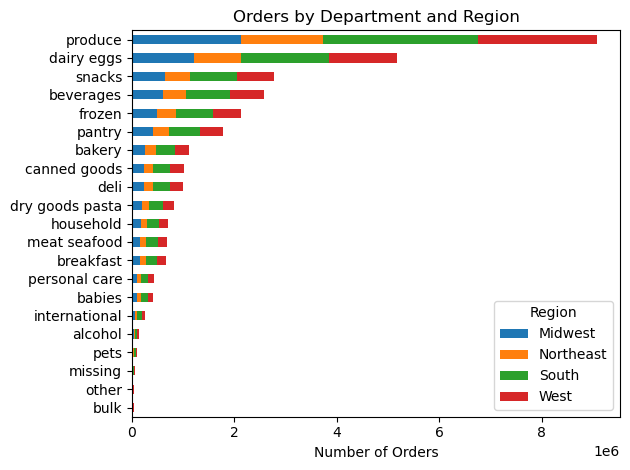

In [18]:
# Horizontal bar chart showing total orders by department and region

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df_merged.groupby(['department', 'Region']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_region_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_region_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
ax = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of Orders')
plt.ylabel('')
plt.title('Orders by Department and Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Region')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_region.png'), bbox_inches='tight', pad_inches=0.1)

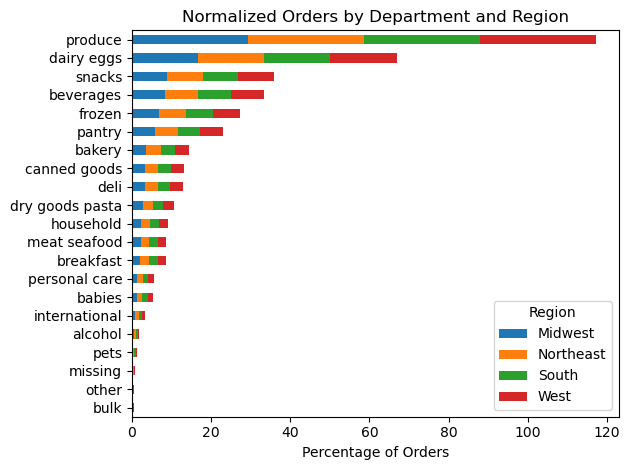

In [19]:
# Horizontal bar chart showing total orders by department and region normalizing for different region sizes

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df_merged.groupby(['department', 'Region']).size().unstack()

# Calculate the total number of customers in each region
total_customers = df_merged['Region'].value_counts()

# Normalize the data by dividing the department_region_counts by the total_customers for each region
normalized_data = sorted_data.div(total_customers, axis=1) * 100  

# Plot the stacked horizontal bar chart
ax = normalized_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Percentage of Orders')
plt.ylabel('')
plt.title('Normalized Orders by Department and Region')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Region')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'normalized_orders_by_department_and_region.png'), bbox_inches='tight', pad_inches=0.1)

## Next I want to revisit a chart from 4.9 that calculated orders by hour of day. I first made it based on the average item price per hour. Instead I want to see it on the average ORDER price per hour. (Original table has been deleted from previous notebook.)


In [20]:
# Group by 'order_id' and calculate the sum of prices for each order
order_totals = df_merged.groupby('order_id')['prices'].sum()

# Merge the calculated order totals back into the original DataFrame
df_merged = pd.merge(df_merged, order_totals, on='order_id', how='left', suffixes=('', '_total'))

# Calculate the mean order total for each 'order_hour_of_day'
mean_order_totals = df_merged.groupby('order_hour_of_day')['prices_total'].mean().reset_index()

# Rename the column to 'mean_order_total'
mean_order_totals = mean_order_totals.rename(columns={'prices_total': 'mean_order_total'})

print(mean_order_totals)

    order_hour_of_day  mean_order_total
0                   0        125.843971
1                   1        125.167062
2                   2        123.681535
3                   3        127.156593
4                   4        133.175082
5                   5        124.556252
6                   6        125.531979
7                   7        125.207602
8                   8        125.106013
9                   9        124.257526
10                 10        124.799184
11                 11        124.721731
12                 12        123.856225
13                 13        123.070459
14                 14        121.963753
15                 15        120.331396
16                 16        118.707893
17                 17        116.224287
18                 18        113.431518
19                 19        113.432980
20                 20        120.402934
21                 21        130.718093
22                 22        133.868064
23                 23        131.195077


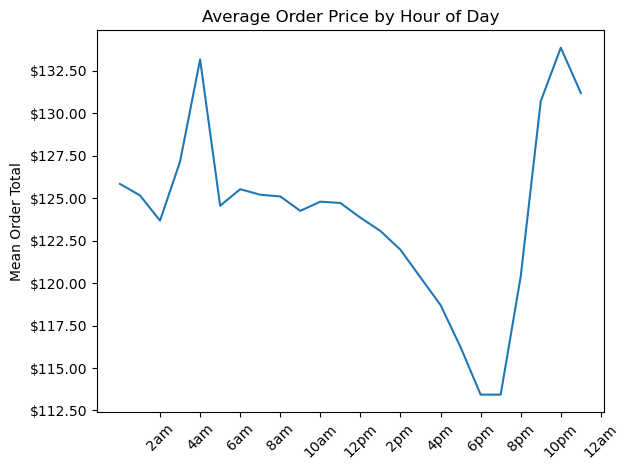

In [21]:
# Next create a line chart from these means

line = sns.lineplot(data=mean_order_totals, x='order_hour_of_day', y='mean_order_total')

# Set custom axis labels
plt.xlabel("")
plt.ylabel("Mean Order Total")

# Add a title to the line graph
line.set_title("Average Order Price by Hour of Day")

# Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']

line.set_xticks(custom_xticks)
line.set_xticklabels(custom_xlabels)

plt.xticks(custom_xticks, custom_xlabels, rotation=45)  # Rotate x-axis labels for readability

# Format y-axis tick labels to display dollars and cents (rounded to 2 decimal places)
def format_dollars_and_cents(value, tick_number):
    dollars, cents = divmod(value, 1)
    cents = round(cents * 100, 2) 
    return f'${int(dollars):,}.{int(cents):02}'  

line.yaxis.set_major_formatter(FuncFormatter(format_dollars_and_cents))

plt.tight_layout()

In [22]:
# Saving line graph (line)

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))

In [25]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data' , 'orders_products_all.pkl'))